# 1. Setup Mario

In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [2]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

C:\Users\dilan\anaconda3\envs\deep-learning\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dilan\anaconda3\envs\deep-learning\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\dilan\anaconda3\envs\deep-learning\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [4]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [5]:
env.observation_space.shape

(240, 256, 3)

In [6]:
env.action_space

Discrete(7)

In [7]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(1000):
    # Start the game to begin with
    if done:
        # Start the game
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

C:\Users\dilan\anaconda3\envs\deep-learning\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\dilan\anaconda3\envs\deep-learning\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


# 2. Preprocess Environment

In [14]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import MatPlotLib
from matplotlib import pyplot as plt

In [15]:
# 1. Create The Base Environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify The Controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap Inside The Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack The Frames
env = VecFrameStack(env, 4, channels_order='last')

In [16]:
state = env.reset()

In [17]:
state.shape

(1, 240, 256, 4)

In [20]:
state, reward, done, info = env.step([env.action_space.sample()])

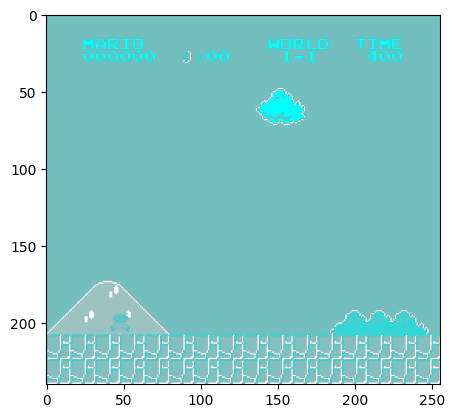

In [21]:
# Use Matplotlib to show the game frame
from matplotlib import pyplot as plt
plt.imshow(state[0])

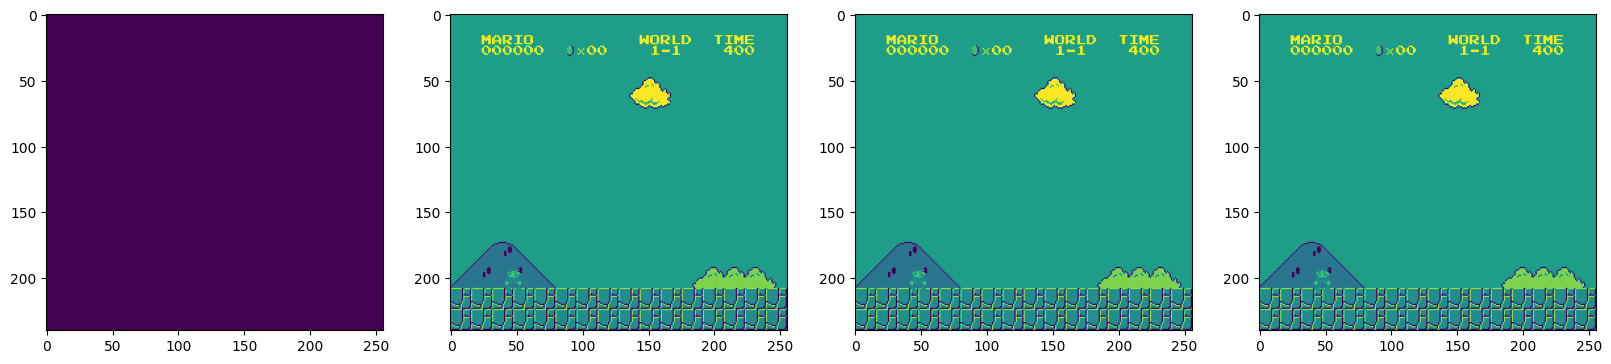

In [28]:
plt.figure(figsize=(20,20))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:, idx])

# 3. Train The RL Model

In [29]:
# Import os for file path management
import os
# Import PPO for alogs
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback